In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     ### import necessary library files to the python environment


In [78]:
df = pd.read_csv('/content/hr_dataset.csv')   ### read the csv file 

In [79]:
df.head()    ### first 5 lines of of the data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [80]:
df.tail()   ### last 5 lines of the data set

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [81]:
df.shape  ### shape of the data

(14999, 10)

In [82]:
df.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [83]:
### there is no missing values present

In [84]:
df.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [85]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [86]:
req_col = (['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion', 'department', 'salary'])

In [87]:
df.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


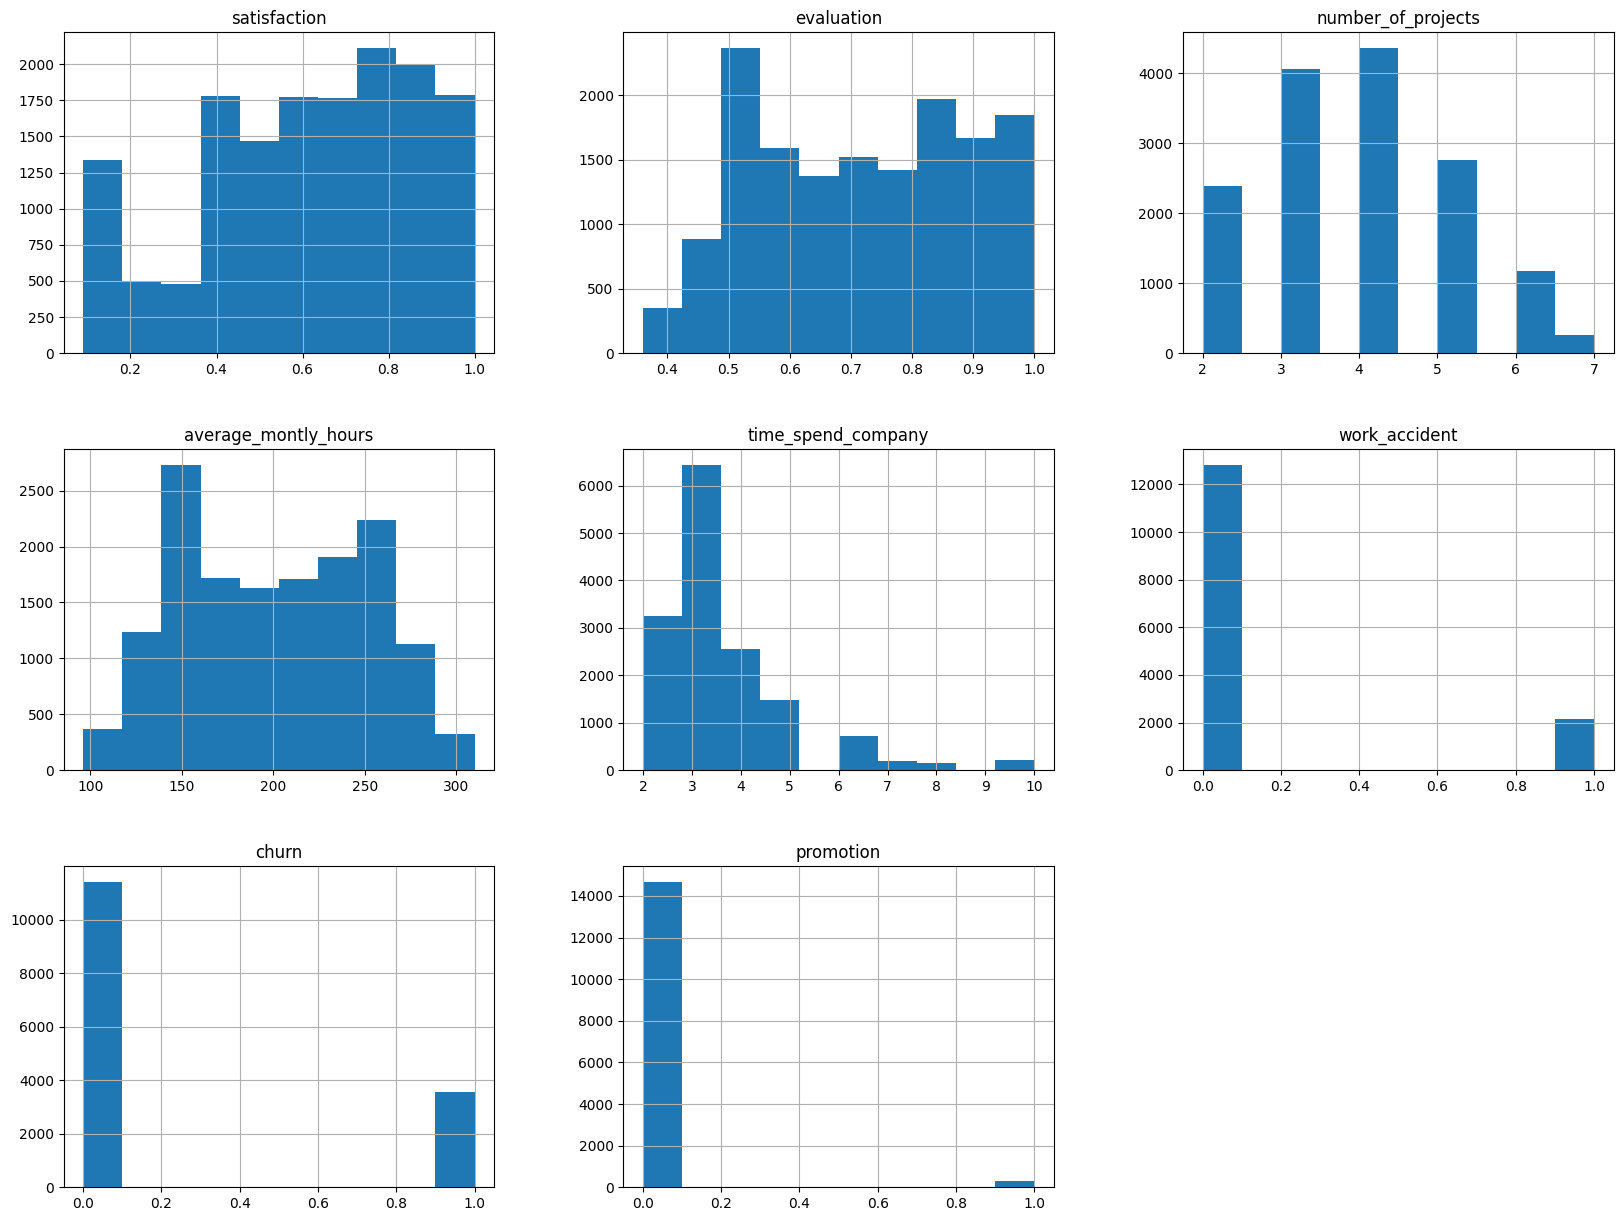

In [88]:
freqgraph = df.select_dtypes(include = ['int32','int64','float'])    ### plottting the distribution of all the data 
freqgraph.hist(figsize = (20,15))
plt.show()

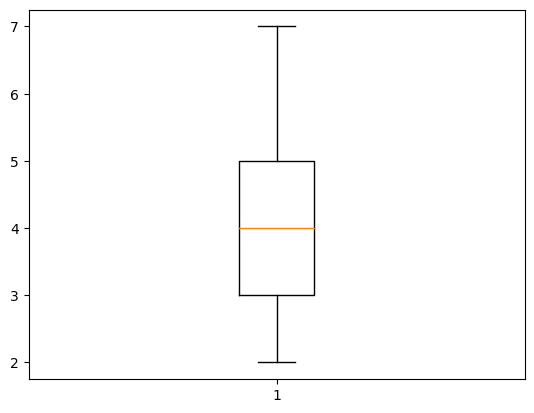

In [89]:
plt.boxplot(df['number_of_projects'])   ### checking for outliers
plt.show()

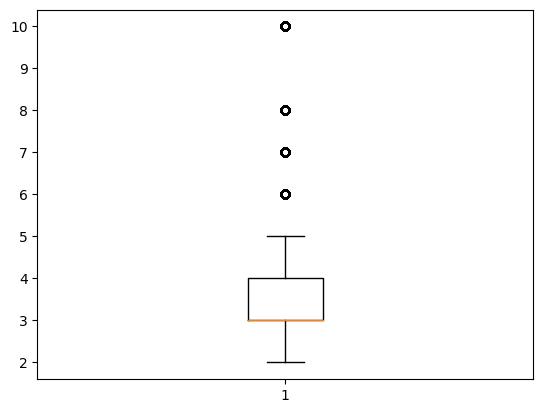

In [90]:
plt.boxplot(df['time_spend_company'])    
                                           
plt.show()

In [91]:
df['time_spend_company'] = np.log(df['time_spend_company'])   ## applying log transformation 

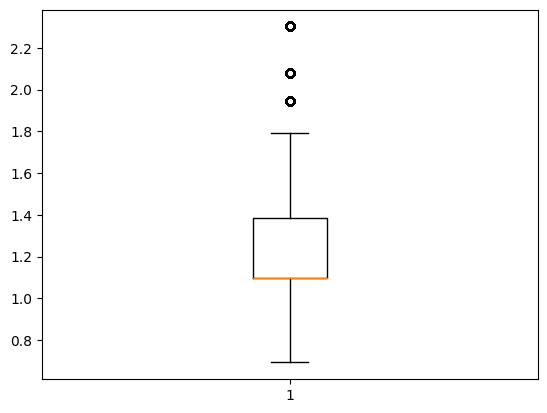

In [92]:
plt.boxplot(df['time_spend_company']) 
plt.show()

In [93]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,1.098612,0,1,0,sales,low
1,0.80,0.86,5,262,1.791759,0,1,0,sales,medium
2,0.11,0.88,7,272,1.386294,0,1,0,sales,medium
3,0.72,0.87,5,223,1.609438,0,1,0,sales,low
4,0.37,0.52,2,159,1.098612,0,1,0,sales,low


In [94]:
### department and salary are categorical


In [95]:
x= df[req_col]
y= df['churn']

In [96]:
x['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [97]:
x['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [98]:
### apply label encoding for 'salary' and one hot encoding for department

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()

In [101]:
le.fit(x['salary'])

LabelEncoder()

In [102]:
le.classes_ = np.array(["low","medium","high"])

In [103]:
x.loc[:,'salary'] = le.transform(x.loc[:,'salary'])

<ipython-input-103-5e3eaa6bc372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'salary'] = le.transform(x.loc[:,'salary'])
<ipython-input-103-5e3eaa6bc372>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'salary'] = le.transform(x.loc[:,'salary'])


In [104]:
x= pd.get_dummies(x)   ### one hot encoding

In [105]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,1.098612,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,1.791759,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,1.386294,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,1.609438,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,1.098612,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,1.098612,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,1.098612,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,1.098612,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,1.386294,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  float64
 5   work_accident           14999 non-null  int64  
 6   promotion               14999 non-null  int64  
 7   salary                  14999 non-null  int64  
 8   department_IT           14999 non-null  uint8  
 9   department_RandD        14999 non-null  uint8  
 10  department_accounting   14999 non-null  uint8  
 11  department_hr           14999 non-null  uint8  
 12  department_management   14999 non-null  uint8  
 13  department_marketing    14999 non-null  uint8  
 14  department_product_mng  14999 non-null

In [107]:
x.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [108]:
y.unique()

array([1, 0])

In [109]:
x.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,1.181700,0.144610,0.021268,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,0.362584,0.351719,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,1.098612,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,1.386294,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,2.302585,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
from sklearn.model_selection import train_test_split   ### splitting the data for testing and training

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 32)

In [112]:
x_train.shape, y_train.shape

((11999, 18), (11999,))

In [113]:
x_test.shape, y_test.shape

((3000, 18), (3000,))

In [114]:
from sklearn.preprocessing import MinMaxScaler   ### scaling
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [115]:
from sklearn.linear_model import LogisticRegression   ### logistic regression

In [116]:
lg = LogisticRegression()    ## creating the instance

In [117]:
lg.fit(x_train , y_train)   ## &fitting

LogisticRegression()

In [118]:
y_pred = lg.predict(x_test)  ## predicting

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [120]:
acc = accuracy_score(y_test, y_pred)
print(acc)


0.7996666666666666


In [121]:
confusion_matrix(y_test, y_pred)

array([[2119,  199],
       [ 402,  280]])

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [123]:
precision_score(y_test, y_pred)

0.5845511482254697

In [124]:
recall_score(y_test, y_pred)

0.41055718475073316

In [125]:
f1_score(y_test, y_pred)

0.4823428079242033

In [126]:
from sklearn.neighbors import KNeighborsClassifier ## applying knn algorithm


In [127]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [128]:
y_pred = knn.predict(x_test)


In [129]:
confusion_matrix(y_test, y_pred)


array([[2220,   98],
       [  74,  608]])

In [130]:
accuracy_score(y_test, y_pred)

0.9426666666666667

In [131]:
from sklearn.model_selection import cross_val_score  ## cross validation

In [132]:
cv_scores = cross_val_score(knn , x_train, y_train, cv = 5)

In [133]:
cv_scores

array([0.94458333, 0.94916667, 0.94625   , 0.9375    , 0.94747812])

In [134]:
cv_scores.mean()   

0.9449956231763235

In [135]:
### cross validated score of knn is 94.49

In [136]:
from sklearn.svm import SVC ## SVC algorithm

In [137]:
sv = SVC(kernel = "linear")

In [138]:
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [139]:
y_pred = sv.predict(x_test)

In [140]:
print(accuracy_score(y_test, y_pred))

0.7893333333333333


In [141]:
sv = SVC(kernel = "poly", degree= 3)

In [142]:
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9426666666666667


In [143]:
sv = SVC(kernel = "rbf")
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9456666666666667


In [148]:
cv_scores = cross_val_score(sv , x_train, y_train, cv = 5)

In [149]:
cv_scores

array([0.94916667, 0.94875   , 0.94583333, 0.93958333, 0.94997916])

In [150]:
cv_scores.mean()

0.9466624982631652

In [ ]:
### cross validated score of svm is 94.66

In [144]:
cv_scores = cross_val_score(sv , x, y, cv = 5)

In [145]:
print(cv_scores)

[0.777      0.77833333 0.78033333 0.78166667 0.78159386]


In [146]:
cv_scores.mean()

0.7797854395909748

In [147]:
## cross validated score of whole dataset is 77.97